In [ ]:
#0234972王雅婷
#泰坦尼克 891 条获救数据集
import pandas as pd
df = pd.read_csv("data/数据-Titanic.csv")  # 读取数据

df.head()
df.shape
df.info()
df

In [ ]:
#0234972王雅婷
#泰坦尼克数据预处理
import pandas as pd

# 读取数据
df = pd.read_csv("data/数据-Titanic.csv")

# 数据清洗与预处理
df.set_index('PassengerId', inplace=True)                 # 设置 PassengerId 为索引
df.drop('Cabin', axis=1, inplace=True)                   # 删除 Cabin 列（缺失过多）
df['Age'] = df['Age'].fillna(df['Age'].median())         # 用中位数填充 Age
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})      # 性别转为数值
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # 港口缺失 → 填充众数
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})      # 类别编码
df['Fare'] = df['Fare'].fillna(df['Fare'].median())      # 用中位数填充 Fare

# 查看数据
print(df.head())      # 前5行
print(df.shape)       # 行列数
print(df.info())      # 信息统计


In [ ]:
#0234972王雅婷

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/数据-titanic.csv")

# 查看数据基本信息
print("数据前5行：")
print(df.head())
print("\n数据基本信息：")
print(df.info())
print("\n数据形状（行, 列）：", df.shape)


df.set_index('PassengerId', inplace=True)                 # 设置 PassengerId 为索引
df.drop('Cabin', axis=1, inplace=True)                   # 删除 Cabin 列（缺失过多）
df['Age'] = df['Age'].fillna(df['Age'].median())         # 用中位数填充 Age
df['Fare'] = df['Fare'].fillna(df['Fare'].median())      # 用中位数填充 Fare
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # 用众数填充 Embarked

# 编码分类变量
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 为可视化准备标签
df['Sex_label'] = df['Sex'].map({0:'male', 1:'female'})
df['Embarked_label'] = df['Embarked'].map({0:'S', 1:'C', 2:'Q'})

# -----------------------------
# 3. 变量相关性分析
# -----------------------------
df_corr = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

# 计算相关系数
cor = df_corr.corr()
print("各数值属性相关系数：\n", cor)

# 绘制热力图
plt.figure(figsize=(8,6))
sns.heatmap(cor, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Titanic 数据属性相关系数热力图")
plt.show()


In [ ]:
#0234972王雅婷
#4 个关键变量（舱位等级、性别、年龄阶段、登船港口）与乘客获救情况的关联
from sympy.physics.control.control_plots import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# 1. 读取数据
data = pd.read_csv("data/数据-Titanic.csv")
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
# 2. 绘图
plt.figure(figsize=(12, 10), dpi=100)

# (1) Pclass 与获救情况
plt.subplot(221)
Pclass_0 = data.loc[data['Survived'] == 0, 'Pclass'].value_counts()
Pclass_1 = data.loc[data['Survived'] == 1, 'Pclass'].value_counts()
df_pclass = pd.DataFrame({'获救': Pclass_1, '未获救': Pclass_0})
df_pclass.plot(kind='bar', ax=plt.gca(), title='不同等级乘客的获救情况')

# (2) 性别与获救情况
plt.subplot(222)
Survived_m = data.loc[data['Sex'] == 'male', 'Survived'].value_counts()
Survived_f = data.loc[data['Sex'] == 'female', 'Survived'].value_counts()
df_sex = pd.DataFrame({'男性': Survived_m, '女性': Survived_f})
df_sex.plot(kind='bar', stacked=True, ax=plt.gca(), title='不同性别乘客的获救情况')

# (3) 年龄与获救情况
plt.subplot(223)
bins = [0, 10, 60, 100]
labels = ['儿童(0-10)', '成年人(10-60)', '老年人(60+)']
data['Age_cut'] = pd.cut(data['Age'], bins=bins, labels=labels)
Age_0 = data.loc[data['Survived'] == 0, 'Age_cut'].value_counts()
Age_1 = data.loc[data['Survived'] == 1, 'Age_cut'].value_counts()
df_age = pd.DataFrame({'获救': Age_1, '未获救': Age_0})
df_age.plot(kind='bar', ax=plt.gca(), title='不同年龄阶段乘客的获救情况')

# (4) 登船港口与获救情况
plt.subplot(224)
Embarked_0 = data.loc[data['Survived'] == 0, 'Embarked'].value_counts()
Embarked_1 = data.loc[data['Survived'] == 1, 'Embarked'].value_counts()
df_Embarked = pd.DataFrame({'获救': Embarked_1, '未获救': Embarked_0})
df_Embarked.plot(kind='bar', stacked=True, ax=plt.gca(), title='不同登船港口乘客的获救情况')

plt.tight_layout()  # 自动调整子图间距
plt.show()


In [ ]:
#0234972王雅婷
#呈现关键变量的分布特征
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
df = pd.read_csv("data/数据-titanic.csv")
df.set_index('PassengerId', inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
# 图1：性别分布
plt.figure(figsize=(5,4))
sns.countplot(x='Sex', data=df)
plt.title('图1 性别分布')
plt.xlabel('性别 (0=男,1=女)')
plt.ylabel('人数')
plt.show()

# 图2：登船港口分布
plt.figure(figsize=(5,4))
sns.countplot(x='Embarked', data=df)
plt.title('图2 登船港口分布')
plt.xlabel('港口 (0=S,1=C,2=Q)')
plt.ylabel('人数')
plt.show()
# 图3：年龄分布直方图
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('图3 年龄分布')
plt.xlabel('年龄')
plt.ylabel('人数')
plt.show()

# 图4：票价箱线图
plt.figure(figsize=(6,4))
sns.boxplot(x='Fare', data=df)
plt.title('图4 票价分布')
plt.xlabel('票价')
plt.show()


In [ ]:
#0234972王雅婷
#呈现关键变量的分布特征
import pandas as pd
import matplotlib.pyplot as plt  # 补充导入绘图模块

# 读取数据
df = pd.read_csv("data/数据-titanic.csv")

# -----------------------------
# 数据清洗与预处理
# -----------------------------
df.set_index('PassengerId', inplace=True)                 # 设置 PassengerId 为索引
df.drop('Cabin', axis=1, inplace=True)                   # 删除 Cabin 列（缺失过多）

# 填充缺失值
df['Age'] = df['Age'].fillna(df['Age'].median())         # 用中位数填充 Age
df['Fare'] = df['Fare'].fillna(df['Fare'].median())      # 用中位数填充 Fare
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # 用众数填充 Embarked

# 编码分类变量
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# -----------------------------
# 堂兄弟姐妹、父母子女个数与获救情况统计
# -----------------------------
df_SibSp = df.groupby(['SibSp', 'Survived']).size().reset_index(name='count')
print("堂兄弟姐妹个数与获救情况：")
print(df_SibSp)

df_Parch = df.groupby(['Parch', 'Survived']).size().reset_index(name='count')
print("\n父母子女个数与获救情况：")
print(df_Parch)

# -----------------------------
# 年龄段分组与生存分析
# -----------------------------
bins = [0, 10, 60, df['Age'].max()]           # 划分区间：儿童、成年人、老年人
labels = ['儿童', '成年人', '老年人']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# 各年龄段生存情况统计
age_survived = df.groupby(['Age_group', 'Survived']).size().unstack()
print("\n各年龄段生存情况统计：\n", age_survived)

# 绘制柱状图
age_survived.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("不同年龄段乘客的获救情况")
plt.xlabel("年龄段")
plt.ylabel("人数")
plt.xticks(rotation=0)
plt.legend(['未获救', '获救'])
plt.show()

# 计算各年龄段生存率
age_survival_rate = age_survived[1] / age_survived.sum(axis=1)
print("\n各年龄段生存率：\n", age_survival_rate)


In [ ]:
#0234972王雅婷
# 划分训练集和测试集
from sklearn.model_selection import train_test_split

# 特征选择
features = ['Pclass', 'Sex', 'Fare', 'Embarked', 'SibSp', 'Parch', 'Age_group']
X = df[features]

# 将年龄段和家庭成员数量进行数值化或独热编码
X = pd.get_dummies(X, columns=['Age_group'], drop_first=True)

y = df['Survived']  # 目标变量

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("训练集样本数:", X_train.shape[0])
print("测试集样本数:", X_test.shape[0])


CART 决策树训练集准确率: 0.8475120385232745
CART 决策树测试集准确率: 0.8246268656716418
CART 决策树测试集分类报告：
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       157
           1       0.87      0.68      0.76       111

    accuracy                           0.82       268
   macro avg       0.84      0.80      0.81       268
weighted avg       0.83      0.82      0.82       268



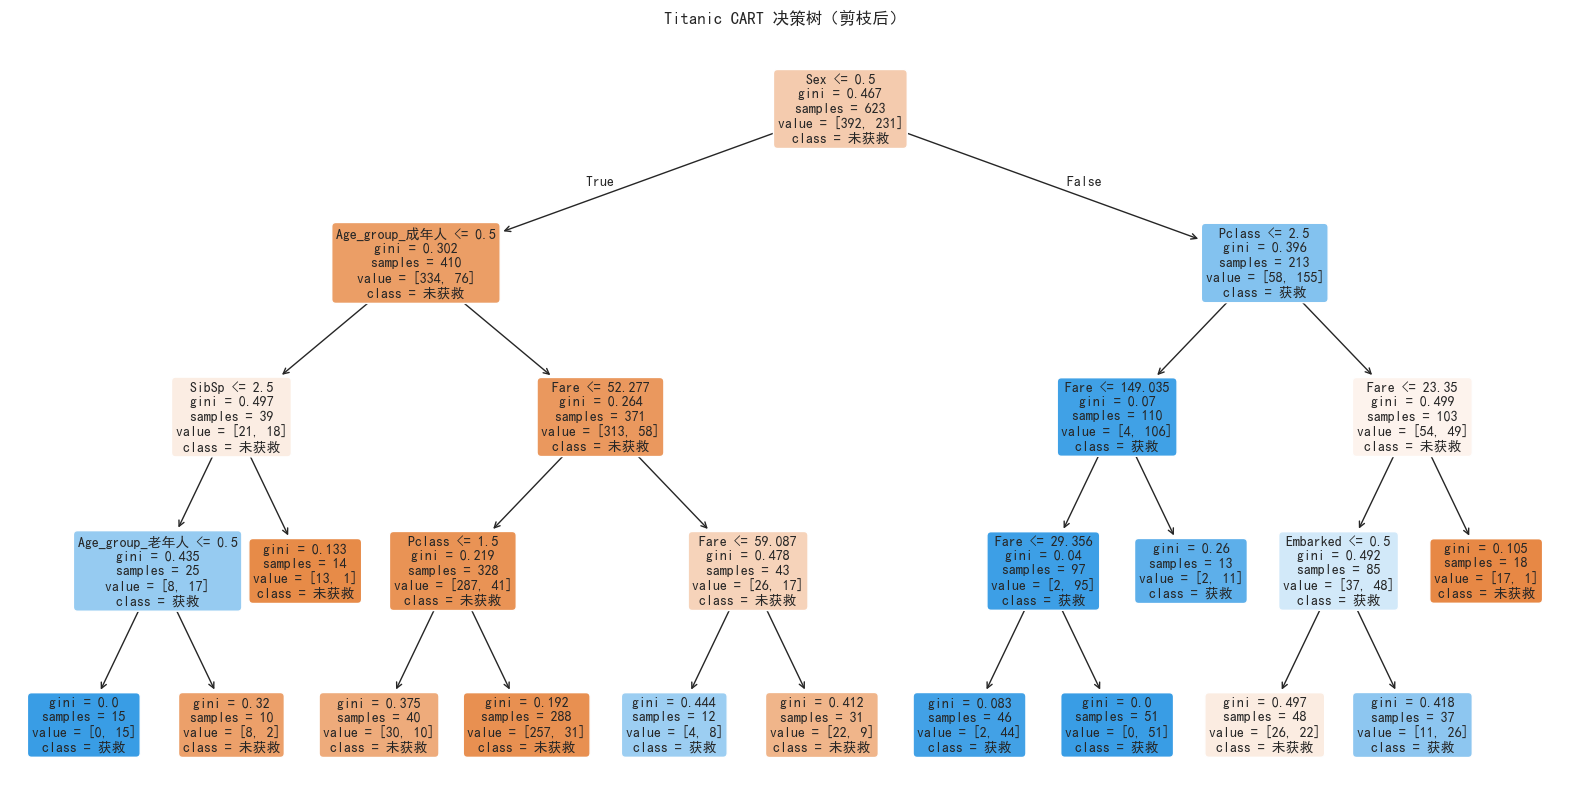

In [44]:
# 0234972 王雅婷
# 决策树分类
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# 1. 读取数据
# -----------------------------
df_wangyating = pd.read_csv("data/数据-Titanic.csv")

# -----------------------------
# 2. 数据清洗与预处理
# -----------------------------
df_wangyating.set_index('PassengerId', inplace=True)
df_wangyating.drop('Cabin', axis=1, inplace=True)
df_wangyating['Age'] = df_wangyating['Age'].fillna(df_wangyating['Age'].median())
df_wangyating['Fare'] = df_wangyating['Fare'].fillna(df_wangyating['Fare'].median())
df_wangyating['Embarked'] = df_wangyating['Embarked'].fillna(df_wangyating['Embarked'].mode()[0])
df_wangyating['Sex'] = df_wangyating['Sex'].map({'male': 0, 'female': 1})
df_wangyating['Embarked'] = df_wangyating['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# -----------------------------
# 3. 年龄分组
# -----------------------------
bins_wangyating = [0, 10, 60, df_wangyating['Age'].max()]
labels_wangyating = ['儿童', '成年人', '老年人']
df_wangyating['Age_group'] = pd.cut(df_wangyating['Age'], bins=bins_wangyating, labels=labels_wangyating)

# -----------------------------
# 4. 特征选择与编码
# -----------------------------
features_wangyating = ['Pclass', 'Sex', 'Fare', 'Embarked', 'SibSp', 'Parch', 'Age_group']
X_wangyating = df_wangyating[features_wangyating]
y_wangyating = df_wangyating['Survived']

# 年龄段独热编码
X_wangyating = pd.get_dummies(X_wangyating, columns=['Age_group'], drop_first=True)

# -----------------------------
# 5. 划分训练集和测试集
# -----------------------------
X_train_wangyating, X_test_wangyating, y_train_wangyating, y_test_wangyating = train_test_split(
    X_wangyating, y_wangyating, test_size=0.3, random_state=42
)

# -----------------------------
# 6. 创建 CART 决策树模型（剪枝）
# -----------------------------
cart_model_wangyating = DecisionTreeClassifier(
    random_state=42,
    max_depth=4,
    min_samples_split=20,
    min_samples_leaf=10
)

# 训练模型
cart_model_wangyating.fit(X_train_wangyating, y_train_wangyating)

# -----------------------------
# 7. 预测与评估
# -----------------------------
y_train_pred_cart_wangyating = cart_model_wangyating.predict(X_train_wangyating)
y_test_pred_cart_wangyating = cart_model_wangyating.predict(X_test_wangyating)

print("CART 决策树训练集准确率:", accuracy_score(y_train_wangyating, y_train_pred_cart_wangyating))
print("CART 决策树测试集准确率:", accuracy_score(y_test_wangyating, y_test_pred_cart_wangyating))
print("CART 决策树测试集分类报告：\n", classification_report(y_test_wangyating, y_test_pred_cart_wangyating))

# -----------------------------
# 8. 决策树可视化
# -----------------------------
plt.figure(figsize=(20,10))
plot_tree(cart_model_wangyating, 
          feature_names=X_train_wangyating.columns,
          class_names=['未获救', '获救'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Titanic CART 决策树（剪枝后）")
plt.show()


In [39]:
# 0234972 王雅婷
# 神经网络
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# 读取数据
# -----------------------------
df_wangyating = pd.read_csv("data/数据-Titanic.csv")

# -----------------------------
# 数据清洗与预处理
# -----------------------------
df_wangyating.set_index('PassengerId', inplace=True)                 
df_wangyating.drop('Cabin', axis=1, inplace=True)                   
df_wangyating['Age'] = df_wangyating['Age'].fillna(df_wangyating['Age'].median())         
df_wangyating['Sex'] = df_wangyating['Sex'].map({'male': 0, 'female': 1})      
df_wangyating['Embarked'] = df_wangyating['Embarked'].fillna(df_wangyating['Embarked'].mode()[0])  
df_wangyating['Embarked'] = df_wangyating['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})      
df_wangyating['Fare'] = df_wangyating['Fare'].fillna(df_wangyating['Fare'].median())      

# 年龄分组
bins_wangyating = [0, 10, 60, df_wangyating['Age'].max()]
labels_wangyating = ['儿童','成年人','老年人']
df_wangyating['Age_group'] = pd.cut(df_wangyating['Age'], bins=bins_wangyating, labels=labels_wangyating)

# 特征与目标
features_wangyating = ['Pclass', 'Sex', 'Fare', 'Embarked', 'SibSp', 'Parch', 'Age_group']
X_wangyating = df_wangyating[features_wangyating]
y_wangyating = df_wangyating['Survived']

# 独热编码
X_wangyating = pd.get_dummies(X_wangyating, columns=['Age_group'], drop_first=True)

# 划分训练集和测试集
X_train_wangyating, X_test_wangyating, y_train_wangyating, y_test_wangyating = train_test_split(
    X_wangyating, y_wangyating, test_size=0.3, random_state=42
)

# -----------------------------
# 神经网络模型
# -----------------------------
nn_model_wangyating = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)
nn_model_wangyating.fit(X_train_wangyating, y_train_wangyating)

# 预测
y_train_pred_nn_wangyating = nn_model_wangyating.predict(X_train_wangyating)
y_test_pred_nn_wangyating = nn_model_wangyating.predict(X_test_wangyating)

# 评估
print("神经网络训练集准确率:", accuracy_score(y_train_wangyating, y_train_pred_nn_wangyating))
print("神经网络测试集准确率:", accuracy_score(y_test_wangyating, y_test_pred_nn_wangyating))
print("神经网络测试集分类报告：\n", classification_report(y_test_wangyating, y_test_pred_nn_wangyating))


神经网络训练集准确率: 0.8041733547351525
神经网络测试集准确率: 0.7798507462686567
神经网络测试集分类报告：
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       157
           1       0.75      0.69      0.72       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [47]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# -----------------------------
# 读取数据
# -----------------------------
df_wangyating = pd.read_csv("data/数据-Titanic.csv")

# -----------------------------
# 数据清洗与预处理
# -----------------------------
df_wangyating.set_index('PassengerId', inplace=True)                 
df_wangyating.drop('Cabin', axis=1, inplace=True)                   
df_wangyating['Age'] = df_wangyating['Age'].fillna(df_wangyating['Age'].median())         
df_wangyating['Sex'] = df_wangyating['Sex'].map({'male': 0, 'female': 1})      
df_wangyating['Embarked'] = df_wangyating['Embarked'].fillna(df_wangyating['Embarked'].mode()[0])  
df_wangyating['Embarked'] = df_wangyating['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})      
df_wangyating['Fare'] = df_wangyating['Fare'].fillna(df_wangyating['Fare'].median())      

# 年龄分组
bins_wangyating = [0, 10, 60, df_wangyating['Age'].max()]
labels_wangyating = ['儿童','成年人','老年人']
df_wangyating['Age_group'] = pd.cut(df_wangyating['Age'], bins=bins_wangyating, labels=labels_wangyating)

# 特征与目标
features_wangyating = ['Pclass', 'Sex', 'Fare', 'Embarked', 'SibSp', 'Parch', 'Age_group']
X_wangyating = df_wangyating[features_wangyating]
y_wangyating = df_wangyating['Survived']

# 独热编码
X_wangyating = pd.get_dummies(X_wangyating, columns=['Age_group'], drop_first=True)

# 划分训练集和测试集
X_train_wangyating, X_test_wangyating, y_train_wangyating, y_test_wangyating = train_test_split(
    X_wangyating, y_wangyating, test_size=0.3, random_state=42
)

# -----------------------------
# 贝叶斯模型
# -----------------------------
nb_model_wangyating = GaussianNB()
nb_model_wangyating.fit(X_train_wangyating, y_train_wangyating)

# 预测
y_train_pred_nb_wangyating = nb_model_wangyating.predict(X_train_wangyating)
y_test_pred_nb_wangyating = nb_model_wangyating.predict(X_test_wangyating)

# 评估
print("贝叶斯网络训练集准确率:", accuracy_score(y_train_wangyating, y_train_pred_nb_wangyating))
print("贝叶斯网络测试集准确率:", accuracy_score(y_test_wangyating, y_test_pred_nb_wangyating))
print("贝叶斯网络测试集分类报告：\n", classification_report(y_test_wangyating, y_test_pred_nb_wangyating))


贝叶斯网络训练集准确率: 0.8154093097913323
贝叶斯网络测试集分类报告：
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       157
           1       0.78      0.76      0.77       111

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



贝叶斯网络训练集准确率: 0.8154093097913323
贝叶斯网络测试集准确率: 0.8097014925373134
贝叶斯网络测试集分类报告：
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       157
           1       0.78      0.76      0.77       111

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

神经网络训练集准确率: 0.8041733547351525
神经网络测试集准确率: 0.7798507462686567
神经网络测试集分类报告：
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       157
           1       0.75      0.69      0.72       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

CART 决策树训练集准确率: 0.8475120385232745
CART 决策树测试集准确率: 0.8246268656716418
CART 决策树测试集分类报告：
               precision    recall  f1-score   support

           0       0.80      0.93      0.86     

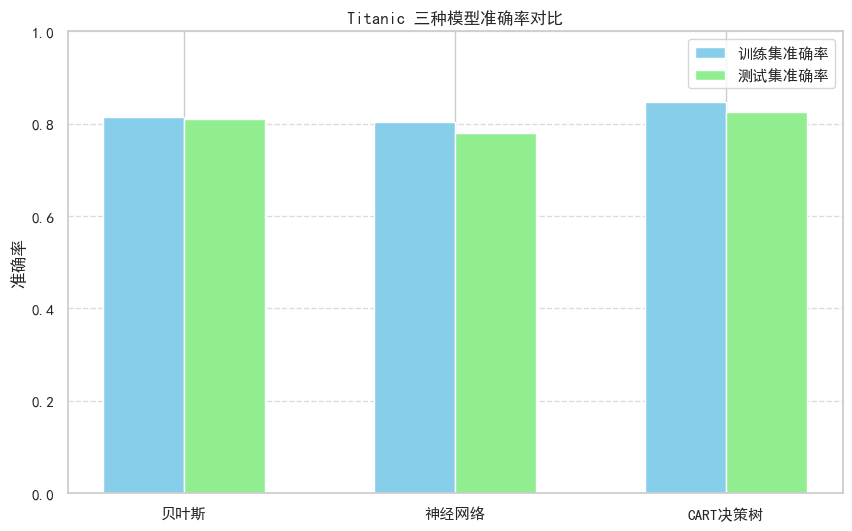

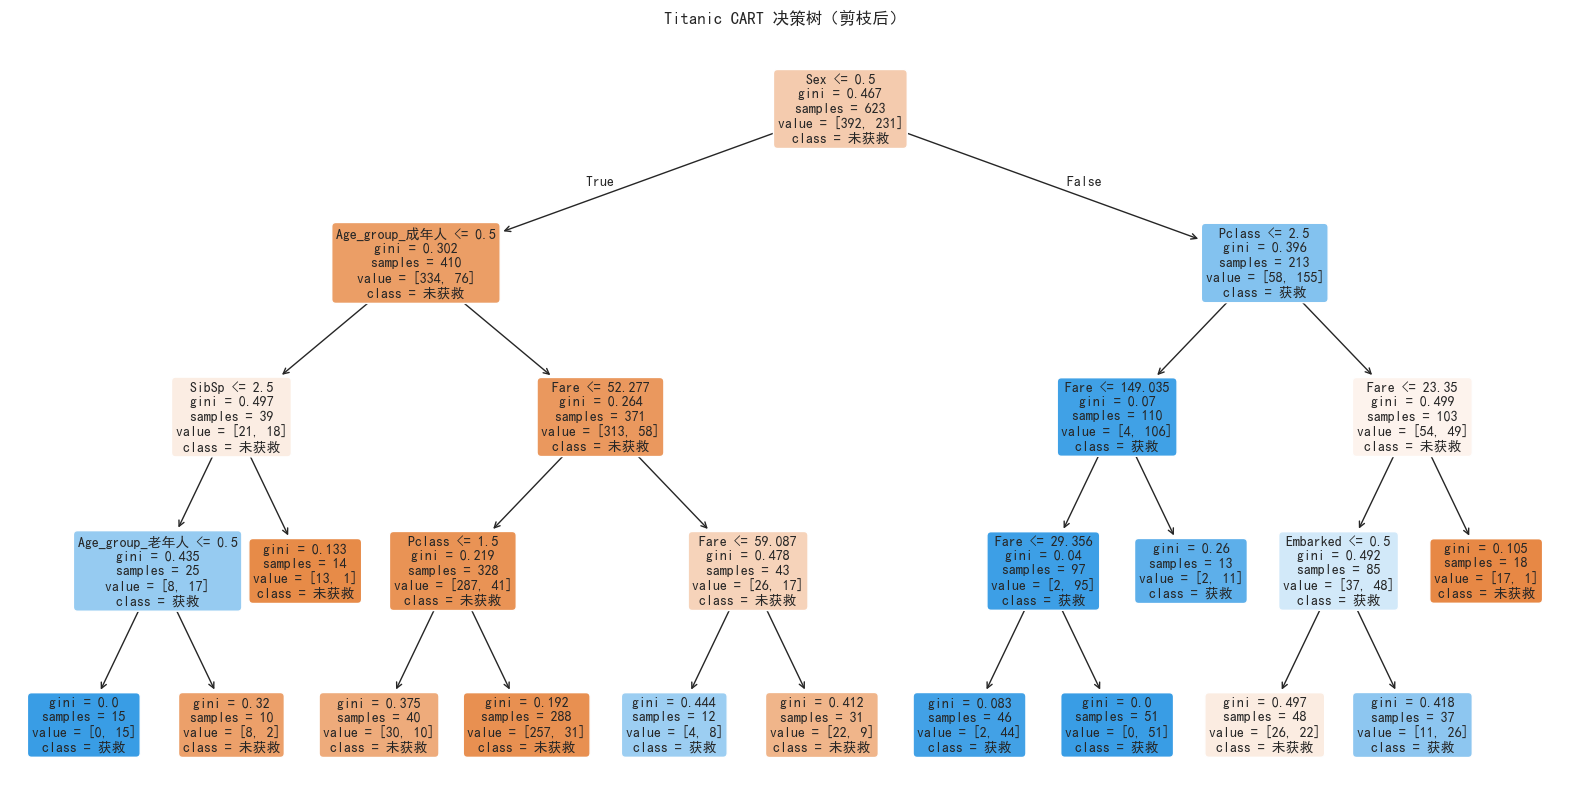

In [46]:
# 0234972 王雅婷 
# Titanic 模型对比
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# -----------------------------
# 1. 读取数据
# -----------------------------
df = pd.read_csv("data/数据-Titanic.csv")

# -----------------------------
# 2. 数据清洗与预处理
# -----------------------------
df.set_index('PassengerId', inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 年龄分组
bins = [0, 10, 60, df['Age'].max()]
labels = ['儿童', '成年人', '老年人']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# 特征选择与编码
features = ['Pclass', 'Sex', 'Fare', 'Embarked', 'SibSp', 'Parch', 'Age_group']
X = df[features]
y = df['Survived']

# 年龄段独热编码
X = pd.get_dummies(X, columns=['Age_group'], drop_first=True)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -----------------------------
# 3. 贝叶斯模型
# -----------------------------
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_train_pred_nb = nb_model.predict(X_train)
y_test_pred_nb = nb_model.predict(X_test)

nb_train_acc = accuracy_score(y_train, y_train_pred_nb)
nb_test_acc = accuracy_score(y_test, y_test_pred_nb)
print("贝叶斯网络训练集准确率:", nb_train_acc)
print("贝叶斯网络测试集准确率:", nb_test_acc)
print("贝叶斯网络测试集分类报告：\n", classification_report(y_test, y_test_pred_nb))

# -----------------------------
# 4. 神经网络模型
# -----------------------------
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)
y_train_pred_nn = nn_model.predict(X_train)
y_test_pred_nn = nn_model.predict(X_test)

nn_train_acc = accuracy_score(y_train, y_train_pred_nn)
nn_test_acc = accuracy_score(y_test, y_test_pred_nn)
print("神经网络训练集准确率:", nn_train_acc)
print("神经网络测试集准确率:", nn_test_acc)
print("神经网络测试集分类报告：\n", classification_report(y_test, y_test_pred_nn))

# -----------------------------
# 5. CART 决策树模型
# -----------------------------
cart_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=4,
    min_samples_split=20,
    min_samples_leaf=10
)
cart_model.fit(X_train, y_train)
y_train_pred_cart = cart_model.predict(X_train)
y_test_pred_cart = cart_model.predict(X_test)

cart_train_acc = accuracy_score(y_train, y_train_pred_cart)
cart_test_acc = accuracy_score(y_test, y_test_pred_cart)
print("CART 决策树训练集准确率:", cart_train_acc)
print("CART 决策树测试集准确率:", cart_test_acc)
print("CART 决策树测试集分类报告：\n", classification_report(y_test, y_test_pred_cart))

# -----------------------------
# 6. 模型准确率可视化对比
# -----------------------------
accuracy_dict = {
    '贝叶斯': {'训练集': nb_train_acc, '测试集': nb_test_acc},
    '神经网络': {'训练集': nn_train_acc, '测试集': nn_test_acc},
    'CART决策树': {'训练集': cart_train_acc, '测试集': cart_test_acc}
}

models = list(accuracy_dict.keys())
train_acc = [accuracy_dict[m]['训练集'] for m in models]
test_acc = [accuracy_dict[m]['测试集'] for m in models]
x = range(len(models))

plt.figure(figsize=(10,6))
plt.bar([i-0.15 for i in x], train_acc, width=0.3, label='训练集准确率', color='skyblue')
plt.bar([i+0.15 for i in x], test_acc, width=0.3, label='测试集准确率', color='lightgreen')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.ylabel('准确率')
plt.title('Titanic 三种模型准确率对比')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# -----------------------------
# 7. CART 决策树可视化
# -----------------------------
plt.figure(figsize=(20,10))
plot_tree(cart_model, 
          feature_names=X_train.columns,
          class_names=['未获救', '获救'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Titanic CART 决策树（剪枝后）")
plt.show()
